<a href="https://colab.research.google.com/github/LalithaPriya/Algorithm-Handbook/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

model = FNN()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define FNN architecture
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x



In [ ]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# Define data loaders
batch_size = 100
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:

# Initialize FNN model
model = FNN()

# Define loss function, optimizer, and number of epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10


In [ ]:

# Train the model
train_loss = []
test_loss = []
for epoch in range(num_epochs):
    running_train_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Flatten the images into a 784-dimensional vector
        images = images.view(-1, 784)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track the training loss
        running_train_loss += loss.item()
    
    # Compute the test loss
    running_test_loss = 0.0
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            # Flatten the images into a 784-dimensional vector
            images = images.view(-1, 784)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Track the test loss
            running_test_loss += loss.item()
    
    # Print the training and test loss for each epoch
    print('Epoch [{}/{}], Training Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, num_epochs, running_train_loss/len(train_loader), running_test_loss/len(test_loader)))
    
    # Append the training and test loss to their respective lists
    train_loss.append(running_train_loss/len(train_loader))
    test_loss.append(running_test_loss/len(test_loader))



Epoch [1/10], Training Loss: 1.6003, Test Loss: 1.5321
Epoch [2/10], Training Loss: 1.5221, Test Loss: 1.5116
Epoch [3/10], Training Loss: 1.5077, Test Loss: 1.5001
Epoch [4/10], Training Loss: 1.4982, Test Loss: 1.5000
Epoch [5/10], Training Loss: 1.4926, Test Loss: 1.4967
Epoch [6/10], Training Loss: 1.4880, Test Loss: 1.4916
Epoch [7/10], Training Loss: 1.4851, Test Loss: 1.4920
Epoch [8/10], Training Loss: 1.4828, Test Loss: 1.4888
Epoch [9/10], Training Loss: 1.4814, Test Loss: 1.4897
Epoch [10/10], Training Loss: 1.4791, Test Loss: 1.4894


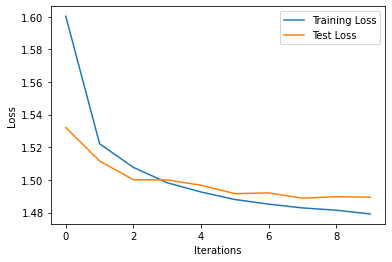

In [26]:
# Plot the training and test loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
